In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal.signaltools
import pymc as pm
import arviz as az

In [3]:
start_date = '2021-06-01'
end_date = '2021-06-15'
val_split: '2021-06-25'
x_col = ['timestamp', 'lon', 'lat']
y_col = 'P1'

In [4]:
data = pd.read_csv('../DATA/processed/dataset.csv', parse_dates=['timestamp'])

In [5]:
data = data[
        (data['timestamp'] >= start_date)
        & (data['timestamp'] < end_date)]
data = data.dropna(subset=['P1'])
data = data[x_col + [y_col, 'sds_sensor']]

In [6]:
len(data)

42584

In [7]:
def plot_time(predictions: pd.DataFrame):
    fig, axs = plt.subplots(1, 1, sharex=True, figsize=(15, 5))
    predictions = predictions.reset_index()
    predictions = predictions.groupby(['timestamp'], as_index=False).mean()
    #predictions['sds_sensor'] = 1
    predictions[['P1']].plot(ax=axs)
    #predictions[['var']].plot(ax=axs[1])

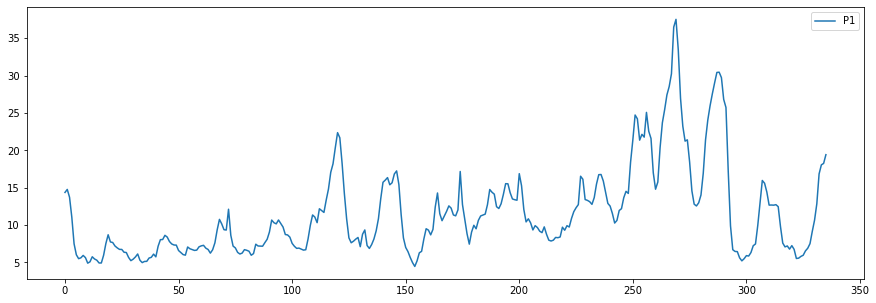

In [8]:
plot_time(data)

In [9]:
data = data.groupby(['timestamp'], as_index=False).mean()[['timestamp', 'lon', 'lat', 'P1']]

<AxesSubplot:>

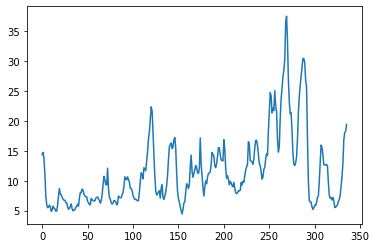

In [10]:
data.P1.plot()

In [11]:
from statsmodels.tsa.stattools import acovf
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import periodogram

/home/anatoly/miniconda3/envs/mlforair/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:441: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Auto-covariance function')

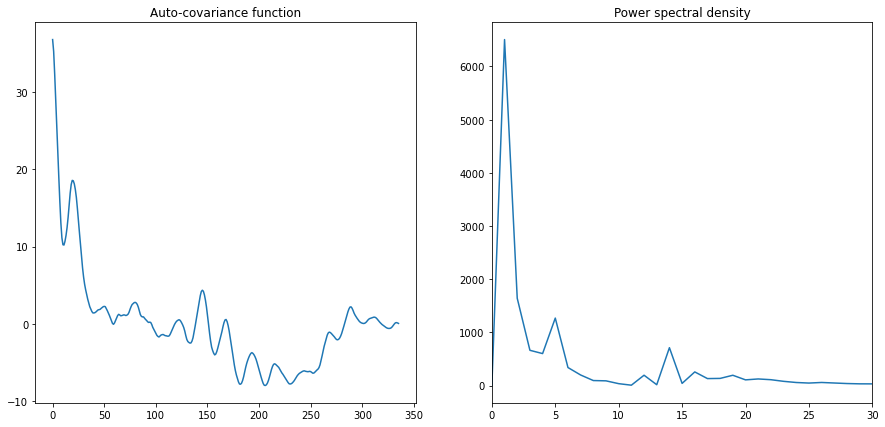

In [13]:
y = data.P1
acf = acovf(y)
_, pxx = periodogram(acf)
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].plot(acf)
ax[1].plot(pxx)
ax[1].set_xlim(0, 30)
ax[1].set_title("Power spectral density")
ax[0].set_title("Auto-covariance function")